In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

Loaded  5 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

# Configurando rede Neural

##### teff

In [52]:
# define baseline model
def baseline_model_teff():
    # create model
    input_x0 = Input(shape=(9,), name='inp0')   
    encoded0 = Dense(300, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(200, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(100, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a2)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

##### logg

In [53]:
# define baseline model
def baseline_model_logg():
    # create model
    input_x0 = Input(shape=(9,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded3)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

##### feh

In [5]:
# define baseline model
def baseline_model_feh():
    # create model
    input_x0 = Input(shape=(9,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded3)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

###### modelo de teste Cores

# Escolha do tipo de filtro utilizar

In [13]:
dataSet = pd.read_table("E:\IC\BasesRedeNeural\BaseFiltrada2.csv", encoding='latin-1', delimiter=',', index_col='ObsID')
xtrain = pd.DataFrame()
ytrain = pd.DataFrame()

In [14]:
fig = px.scatter(dataSet, x="Teffcnn", y="loggcnn", color='Teffcnn')
fig.update_xaxes(range=[7000, 3000])
fig.update_yaxes(range=[5, 0])
fig.show()

### Procurando e limpando outliers

In [19]:
baseMolde1 = dataSet.loc[(dataSet['mag_psf_u'] != -999) & (dataSet['mag_psf_J0378'] != -999) & 
                          (dataSet['mag_psf_J0395'] != -999) & (dataSet['mag_psf_J0410'] != -999) & 
                          (dataSet['mag_psf_J0430'] != -999) & (dataSet['mag_psf_g'] != -999) &
                          (dataSet['mag_psf_J0515'] != -999) & 
                          (dataSet['mag_psf_J0660'] != -999) & (dataSet['mag_psf_J0861'] != -999) & 
                          (dataSet['mag_psf_u'] != '-999') & (dataSet['mag_psf_J0378'] != '-999') & 
                          (dataSet['mag_psf_J0395'] != '-999') & (dataSet['mag_psf_J0410'] != '-999') & 
                          (dataSet['mag_psf_J0430'] != '-999') & (dataSet['mag_psf_g'] != '-999') &
                          (dataSet['mag_psf_J0515'] != '-999') & (dataSet['mag_psf_J0660'] != '-999') & 
                          (dataSet['mag_psf_J0861'] != '-999'),
                          ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]

def cap_outliers(df, column):
    """Remove outliers.
    Args:
        df (pd.DataFrame): DataFrame
        column (str): column name to remove outliers
    Returns:
        pd.DataFrame: Update dataframe.
    """    
    upper = baseMolde1[column].mean() + 3*baseMolde1[column].std()
    down = baseMolde1[column].mean() - 3*baseMolde1[column].std()

    df[(df[column] > upper) | (df[column] < down)]

    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<down,
            down,
            df[column]
        )
    )
    
    return df

## Verificando valores -999
Foram removidos filtros que tinham mais valores faltantes do que valores reais.

In [16]:
for column in dataSet:
    print(column)

mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_J0660
mag_psf_J0861
alphacnn
Teffcnn
loggcnn
[Fe/H]cnn
[C/Fe]
[N/Fe]
[O/Fe]
[Mg/Fe]
[Al/Fe]
[Si/Fe]
[S/Fe]
[Ca/Fe]
[Ti/Fe]
[Cr/Fe]
[Ni/Fe]
[Cu/Fe]


(array([1266.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1500.]),
 array([-999.      , -897.150468, -795.300936, -693.451404, -591.601872,
        -489.75234 , -387.902808, -286.053276, -184.203744,  -82.354212,
          19.49532 ]),
 <BarContainer object of 10 artists>)

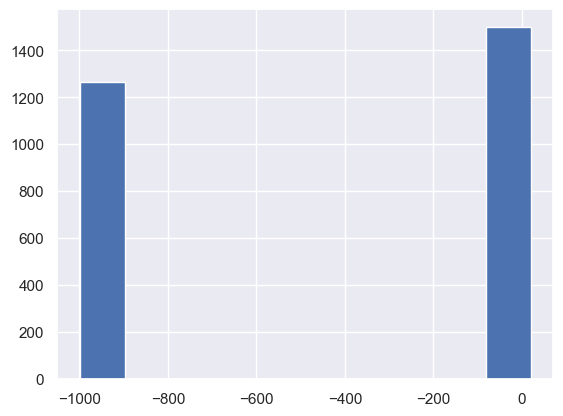

In [45]:
plt.hist(dataSet["Colunas"])

In [14]:
ydataSet.max()

alphacnn        0.29500
Teffcnn      6981.75000
loggcnn         4.85500
[Fe/H]cnn       0.42100
[C/Fe]          0.59101
[N/Fe]          0.63326
[O/Fe]          0.30949
[Mg/Fe]         0.35281
[Al/Fe]         0.27693
[Si/Fe]         0.29385
[S/Fe]          0.58685
[Ca/Fe]         0.33524
[Ti/Fe]         0.20331
[Cr/Fe]         0.15625
[Ni/Fe]         0.13532
[Cu/Fe]         0.34173
dtype: float64

In [15]:
ydataSet.min()

alphacnn       -0.21600
Teffcnn      4456.16000
loggcnn         3.50300
[Fe/H]cnn      -1.16100
[C/Fe]         -0.29599
[N/Fe]         -0.32356
[O/Fe]      -9999.00000
[Mg/Fe]        -0.51214
[Al/Fe]     -9999.00000
[Si/Fe]        -0.24688
[S/Fe]      -9999.00000
[Ca/Fe]        -0.29836
[Ti/Fe]     -9999.00000
[Cr/Fe]     -9999.00000
[Ni/Fe]        -0.12873
[Cu/Fe]     -9999.00000
dtype: float64

## Separando as Anas

In [15]:
Anas = dataSet.loc[(dataSet['Teffcnn']>3500) & 
                     (dataSet['Teffcnn']<7000) &
                     (dataSet['loggcnn']>3.5)]

In [16]:
xdataSet = Anas[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                       'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                       'mag_psf_J0515', 'mag_psf_J0660', 
                       'mag_psf_J0861']]

In [17]:
ydataSet = Anas[['alphacnn', 'Teffcnn', 'loggcnn', '[Fe/H]cnn', 
                '[C/Fe]', '[N/Fe]', '[O/Fe]', '[Mg/Fe]', 
                '[Al/Fe]', '[Si/Fe]', '[S/Fe]', '[Ca/Fe]', 
                '[Ti/Fe]', '[Cr/Fe]', '[Ni/Fe]', '[Cu/Fe]']]

In [18]:
print(ydataSet['loggcnn'].min())
print(ydataSet['loggcnn'].max())

3.503
4.855


In [20]:
fig = px.scatter(dataSet, x="Teffcnn", y="loggcnn", color='Teffcnn')
fig.update_xaxes(range=[8000, 3500])
fig.update_yaxes(range=[5, 0])
fig.show()

In [21]:
fig = px.scatter(Anas, x="Teffcnn", y="loggcnn", color='Teffcnn')
fig.update_xaxes(range=[8000, 3500])
fig.update_yaxes(range=[5, 0])
fig.show()

In [22]:
Anas

,mag_psf_u,mag_psf_J0378,mag_psf_J0395,mag_psf_J0410,mag_psf_J0430,mag_psf_g,mag_psf_J0515,mag_psf_J0660,mag_psf_J0861,alphacnn,...,[O/Fe],[Mg/Fe],[Al/Fe],[Si/Fe],[S/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Cu/Fe]
ObsID,,,,,,,,,,,,,,,,,,,,,
589602184,15.01453,14.64653,14.58852,14.11853,14.04753,13.76753,13.59553,13.27640,13.13994,0.014,...,-9999.0,0.04902,-9999.0,-0.01506,-9999.0,0.13247,-9999.0,-9999.0,-0.00297,-9999.0
589602185,14.59844,14.24744,14.14344,13.59617,13.52717,13.21817,13.02917,12.73564,12.61175,0.000,...,-9999.0,0.01190,-9999.0,0.01152,-9999.0,-0.01401,-9999.0,-9999.0,0.03999,-9999.0
589602186,14.87307,14.48807,14.41307,13.89239,13.83339,13.54339,13.36439,13.08907,12.95712,-0.001,...,-9999.0,0.01171,-9999.0,0.02098,-9999.0,-0.00359,-9999.0,-9999.0,0.03895,-9999.0
589603006,-999.00000,14.88259,14.69559,13.99569,13.86868,13.32628,13.10569,-999.00000,12.38345,0.012,...,-9999.0,0.04586,-9999.0,-0.00632,-9999.0,0.04014,-9999.0,-9999.0,0.04143,-9999.0
589603013,14.98025,14.58651,14.48225,13.92462,13.83693,13.49263,13.29493,-999.00000,12.87653,0.019,...,-9999.0,0.04092,-9999.0,0.04061,-9999.0,-0.00892,-9999.0,-9999.0,0.03992,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914244,13.70579,13.34379,13.26200,12.80611,12.74011,12.43811,12.26611,-999.00000,-999.00000,0.001,...,-9999.0,0.00444,-9999.0,0.00882,-9999.0,-0.00882,-9999.0,-9999.0,0.01199,-9999.0
695914245,14.74633,14.33324,14.30027,13.85634,13.79507,13.52007,13.33807,13.05552,12.93147,0.156,...,-9999.0,0.21172,-9999.0,0.15608,-9999.0,0.20675,-9999.0,-9999.0,0.02067,-9999.0
695914246,14.59593,14.19393,14.15923,13.65657,13.60657,13.29057,13.11457,12.81830,12.69828,0.138,...,-9999.0,0.20603,-9999.0,0.10985,-9999.0,0.12273,-9999.0,-9999.0,0.02266,-9999.0


##### Treinando TEFF

In [14]:
xtrain = Anas[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]

In [15]:
ytrain = Anas[['Teffcnn']]

In [16]:
xtrain.shape

(2306, 9)

In [17]:
ytrain.shape

(2306, 1)

In [20]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [21]:
train_x= encoder.encode_DataFrame(xtrain, "cnnNew")#The input vector: 9 stellar filters from splus; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'cnnTeff')

In [22]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [23]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [24]:
bs = 3000

In [60]:
modelteff = baseline_model_teff()

In [61]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modelteff.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
1/1 - 1s - loss: 0.1128 - val_loss: 0.1111 - 532ms/epoch - 532ms/step
Epoch 2/30
1/1 - 0s - loss: 0.1123 - val_loss: 0.1106 - 36ms/epoch - 36ms/step
Epoch 3/30
1/1 - 0s - loss: 0.1117 - val_loss: 0.1102 - 37ms/epoch - 37ms/step
Epoch 4/30
1/1 - 0s - loss: 0.1112 - val_loss: 0.1097 - 37ms/epoch - 37ms/step
Epoch 5/30
1/1 - 0s - loss: 0.1107 - val_loss: 0.1092 - 35ms/epoch - 35ms/step
Epoch 6/30
1/1 - 0s - loss: 0.1102 - val_loss: 0.1087 - 36ms/epoch - 36ms/step
Epoch 7/30
1/1 - 0s - loss: 0.1097 - val_loss: 0.1082 - 34ms/epoch - 34ms/step
Epoch 8/30
1/1 - 0s - loss: 0.1092 - val_loss: 0.1077 - 33ms/epoch - 33ms/step
Epoch 9/30
1/1 - 0s - loss: 0.1086 - val_loss: 0.1072 - 34ms/epoch - 34ms/step
Epoch 10/30
1/1 - 0s - loss: 0.1081 - val_loss: 0.1068 - 34ms/epoch - 34ms/step
Epoch 11/30
1/1 - 0s - loss: 0.1076 - val_loss: 0.1063 - 34ms/epoch - 34ms/step
Epoch 12/30
1/1 - 0s - loss: 0.1071 - val_loss: 0.1058 - 32ms/epoch - 32ms/step
Epoch 13/30
1/1 - 0s - loss: 0.1066 - val_loss:

In [62]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyteff = modelteff.fit(X_train, Y_train, epochs = 400, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modelteff.save('model/model_lamost_teff_V.h5') 

Epoch 1/400
1/1 - 0s - loss: 0.0967 - val_loss: 0.0957 - 151ms/epoch - 151ms/step
Epoch 2/400
1/1 - 0s - loss: 0.0961 - val_loss: 0.0951 - 39ms/epoch - 39ms/step
Epoch 3/400
1/1 - 0s - loss: 0.0955 - val_loss: 0.0945 - 36ms/epoch - 36ms/step
Epoch 4/400
1/1 - 0s - loss: 0.0948 - val_loss: 0.0939 - 35ms/epoch - 35ms/step
Epoch 5/400
1/1 - 0s - loss: 0.0942 - val_loss: 0.0933 - 34ms/epoch - 34ms/step
Epoch 6/400
1/1 - 0s - loss: 0.0936 - val_loss: 0.0926 - 36ms/epoch - 36ms/step
Epoch 7/400
1/1 - 0s - loss: 0.0930 - val_loss: 0.0920 - 37ms/epoch - 37ms/step
Epoch 8/400
1/1 - 0s - loss: 0.0923 - val_loss: 0.0914 - 35ms/epoch - 35ms/step
Epoch 9/400
1/1 - 0s - loss: 0.0917 - val_loss: 0.0908 - 38ms/epoch - 38ms/step
Epoch 10/400
1/1 - 0s - loss: 0.0910 - val_loss: 0.0901 - 49ms/epoch - 49ms/step
Epoch 11/400
1/1 - 0s - loss: 0.0904 - val_loss: 0.0895 - 57ms/epoch - 57ms/step
Epoch 12/400
1/1 - 0s - loss: 0.0897 - val_loss: 0.0888 - 53ms/epoch - 53ms/step
Epoch 13/400
1/1 - 0s - loss: 0.089

Epoch 103/400
1/1 - 0s - loss: 0.0553 - val_loss: 0.0528 - 37ms/epoch - 37ms/step
Epoch 104/400
1/1 - 0s - loss: 0.0551 - val_loss: 0.0525 - 38ms/epoch - 38ms/step
Epoch 105/400
1/1 - 0s - loss: 0.0549 - val_loss: 0.0522 - 36ms/epoch - 36ms/step
Epoch 106/400
1/1 - 0s - loss: 0.0547 - val_loss: 0.0519 - 38ms/epoch - 38ms/step
Epoch 107/400
1/1 - 0s - loss: 0.0546 - val_loss: 0.0517 - 37ms/epoch - 37ms/step
Epoch 108/400
1/1 - 0s - loss: 0.0544 - val_loss: 0.0514 - 38ms/epoch - 38ms/step
Epoch 109/400
1/1 - 0s - loss: 0.0542 - val_loss: 0.0511 - 42ms/epoch - 42ms/step
Epoch 110/400
1/1 - 0s - loss: 0.0540 - val_loss: 0.0509 - 46ms/epoch - 46ms/step
Epoch 111/400
1/1 - 0s - loss: 0.0538 - val_loss: 0.0506 - 51ms/epoch - 51ms/step
Epoch 112/400
1/1 - 0s - loss: 0.0536 - val_loss: 0.0503 - 49ms/epoch - 49ms/step
Epoch 113/400
1/1 - 0s - loss: 0.0535 - val_loss: 0.0501 - 56ms/epoch - 56ms/step
Epoch 114/400
1/1 - 0s - loss: 0.0533 - val_loss: 0.0498 - 44ms/epoch - 44ms/step
Epoch 115/400
1/

Epoch 203/400
1/1 - 0s - loss: 0.0429 - val_loss: 0.0395 - 31ms/epoch - 31ms/step
Epoch 204/400
1/1 - 0s - loss: 0.0428 - val_loss: 0.0395 - 33ms/epoch - 33ms/step
Epoch 205/400
1/1 - 0s - loss: 0.0427 - val_loss: 0.0394 - 33ms/epoch - 33ms/step
Epoch 206/400
1/1 - 0s - loss: 0.0426 - val_loss: 0.0394 - 32ms/epoch - 32ms/step
Epoch 207/400
1/1 - 0s - loss: 0.0425 - val_loss: 0.0394 - 33ms/epoch - 33ms/step
Epoch 208/400
1/1 - 0s - loss: 0.0424 - val_loss: 0.0393 - 33ms/epoch - 33ms/step
Epoch 209/400
1/1 - 0s - loss: 0.0424 - val_loss: 0.0393 - 34ms/epoch - 34ms/step
Epoch 210/400
1/1 - 0s - loss: 0.0423 - val_loss: 0.0392 - 40ms/epoch - 40ms/step
Epoch 211/400
1/1 - 0s - loss: 0.0422 - val_loss: 0.0392 - 40ms/epoch - 40ms/step
Epoch 212/400
1/1 - 0s - loss: 0.0421 - val_loss: 0.0392 - 46ms/epoch - 46ms/step
Epoch 213/400
1/1 - 0s - loss: 0.0420 - val_loss: 0.0391 - 46ms/epoch - 46ms/step
Epoch 214/400
1/1 - 0s - loss: 0.0419 - val_loss: 0.0391 - 47ms/epoch - 47ms/step
Epoch 215/400
1/

Epoch 303/400
1/1 - 0s - loss: 0.0365 - val_loss: 0.0377 - 40ms/epoch - 40ms/step
Epoch 304/400
1/1 - 0s - loss: 0.0365 - val_loss: 0.0377 - 39ms/epoch - 39ms/step
Epoch 305/400
1/1 - 0s - loss: 0.0365 - val_loss: 0.0377 - 40ms/epoch - 40ms/step
Epoch 306/400
1/1 - 0s - loss: 0.0364 - val_loss: 0.0377 - 36ms/epoch - 36ms/step
Epoch 307/400
1/1 - 0s - loss: 0.0364 - val_loss: 0.0377 - 40ms/epoch - 40ms/step
Epoch 308/400
1/1 - 0s - loss: 0.0363 - val_loss: 0.0377 - 39ms/epoch - 39ms/step
Epoch 309/400
1/1 - 0s - loss: 0.0363 - val_loss: 0.0377 - 38ms/epoch - 38ms/step
Epoch 310/400
1/1 - 0s - loss: 0.0362 - val_loss: 0.0377 - 37ms/epoch - 37ms/step
Epoch 311/400
1/1 - 0s - loss: 0.0362 - val_loss: 0.0377 - 37ms/epoch - 37ms/step
Epoch 312/400
1/1 - 0s - loss: 0.0362 - val_loss: 0.0377 - 39ms/epoch - 39ms/step
Epoch 313/400
1/1 - 0s - loss: 0.0361 - val_loss: 0.0377 - 41ms/epoch - 41ms/step
Epoch 314/400
1/1 - 0s - loss: 0.0361 - val_loss: 0.0377 - 39ms/epoch - 39ms/step
Epoch 315/400
1/

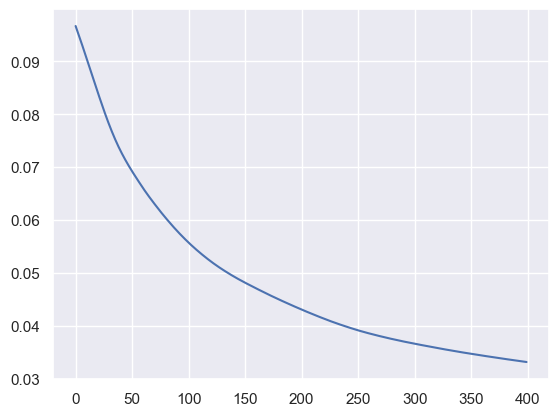

In [63]:
# plota as loss para ver se está treinando
plt.plot(historyteff.history['loss'][:])

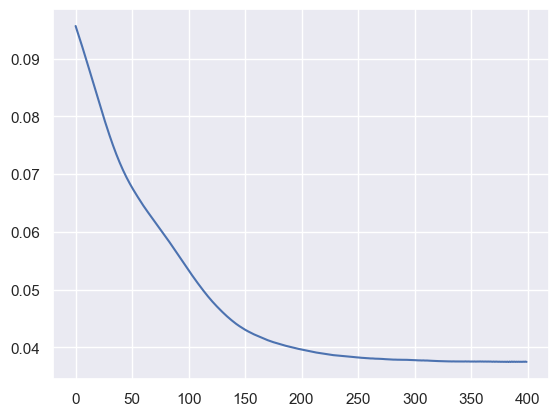

In [64]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyteff.history['val_loss'][:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando LOGG

In [70]:
xtrain = Anas[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]

In [71]:
ytrain = Anas[['loggcnn']]

In [72]:
ytrain.max()

loggcnn    4.855
dtype: float64

In [73]:
ytrain.min()

loggcnn    3.503
dtype: float64

In [74]:
for column in xtrain:
    xtrain = cap_outliers(xtrain, column)

In [76]:
train_x= encoder.encode_DataFrame(xtrain, "cnnNew")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'cnnLogg')
#train_y= ytrain

In [77]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [78]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [79]:
bs = 3000

In [84]:
modellogg = baseline_model_logg()

In [155]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modellogg.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
12/12 - 1s - loss: 0.1870 - val_loss: 0.1806 - 1s/epoch - 104ms/step
Epoch 2/30
12/12 - 0s - loss: 0.1758 - val_loss: 0.1713 - 151ms/epoch - 13ms/step
Epoch 3/30
12/12 - 0s - loss: 0.1660 - val_loss: 0.1603 - 153ms/epoch - 13ms/step
Epoch 4/30
12/12 - 0s - loss: 0.1535 - val_loss: 0.1451 - 131ms/epoch - 11ms/step
Epoch 5/30
12/12 - 0s - loss: 0.1377 - val_loss: 0.1293 - 134ms/epoch - 11ms/step
Epoch 6/30
12/12 - 0s - loss: 0.1257 - val_loss: 0.1236 - 124ms/epoch - 10ms/step
Epoch 7/30
12/12 - 0s - loss: 0.1221 - val_loss: 0.1211 - 112ms/epoch - 9ms/step
Epoch 8/30
12/12 - 0s - loss: 0.1202 - val_loss: 0.1197 - 117ms/epoch - 10ms/step
Epoch 9/30
12/12 - 0s - loss: 0.1189 - val_loss: 0.1187 - 117ms/epoch - 10ms/step
Epoch 10/30
12/12 - 0s - loss: 0.1178 - val_loss: 0.1180 - 122ms/epoch - 10ms/step
Epoch 11/30
12/12 - 0s - loss: 0.1169 - val_loss: 0.1171 - 125ms/epoch - 10ms/step
Epoch 12/30
12/12 - 0s - loss: 0.1160 - val_loss: 0.1165 - 117ms/epoch - 10ms/step
Epoch 13/30
12/1

In [85]:
# Treinando e guardando o modelo                                                                                          (sample_weight=sample_weights, )
historylogg = modellogg.fit(X_train, Y_train, epochs = 200, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modellogg.save('model/model_lamost_logg_V.h5') 

Epoch 1/200
1/1 - 1s - loss: 0.1767 - val_loss: 0.1765 - 781ms/epoch - 781ms/step
Epoch 2/200
1/1 - 0s - loss: 0.1751 - val_loss: 0.1748 - 38ms/epoch - 38ms/step
Epoch 3/200
1/1 - 0s - loss: 0.1738 - val_loss: 0.1734 - 35ms/epoch - 35ms/step
Epoch 4/200
1/1 - 0s - loss: 0.1727 - val_loss: 0.1721 - 36ms/epoch - 36ms/step
Epoch 5/200
1/1 - 0s - loss: 0.1717 - val_loss: 0.1710 - 35ms/epoch - 35ms/step
Epoch 6/200
1/1 - 0s - loss: 0.1709 - val_loss: 0.1700 - 34ms/epoch - 34ms/step
Epoch 7/200
1/1 - 0s - loss: 0.1702 - val_loss: 0.1692 - 36ms/epoch - 36ms/step
Epoch 8/200
1/1 - 0s - loss: 0.1696 - val_loss: 0.1685 - 35ms/epoch - 35ms/step
Epoch 9/200
1/1 - 0s - loss: 0.1691 - val_loss: 0.1680 - 66ms/epoch - 66ms/step
Epoch 10/200
1/1 - 0s - loss: 0.1687 - val_loss: 0.1675 - 35ms/epoch - 35ms/step
Epoch 11/200
1/1 - 0s - loss: 0.1683 - val_loss: 0.1670 - 71ms/epoch - 71ms/step
Epoch 12/200
1/1 - 0s - loss: 0.1680 - val_loss: 0.1666 - 38ms/epoch - 38ms/step
Epoch 13/200
1/1 - 0s - loss: 0.167

Epoch 103/200
1/1 - 0s - loss: 0.1457 - val_loss: 0.1485 - 51ms/epoch - 51ms/step
Epoch 104/200
1/1 - 0s - loss: 0.1455 - val_loss: 0.1484 - 36ms/epoch - 36ms/step
Epoch 105/200
1/1 - 0s - loss: 0.1454 - val_loss: 0.1483 - 34ms/epoch - 34ms/step
Epoch 106/200
1/1 - 0s - loss: 0.1452 - val_loss: 0.1482 - 35ms/epoch - 35ms/step
Epoch 107/200
1/1 - 0s - loss: 0.1451 - val_loss: 0.1481 - 33ms/epoch - 33ms/step
Epoch 108/200
1/1 - 0s - loss: 0.1449 - val_loss: 0.1481 - 33ms/epoch - 33ms/step
Epoch 109/200
1/1 - 0s - loss: 0.1448 - val_loss: 0.1480 - 33ms/epoch - 33ms/step
Epoch 110/200
1/1 - 0s - loss: 0.1446 - val_loss: 0.1479 - 36ms/epoch - 36ms/step
Epoch 111/200
1/1 - 0s - loss: 0.1445 - val_loss: 0.1479 - 34ms/epoch - 34ms/step
Epoch 112/200
1/1 - 0s - loss: 0.1443 - val_loss: 0.1478 - 35ms/epoch - 35ms/step
Epoch 113/200
1/1 - 0s - loss: 0.1442 - val_loss: 0.1477 - 37ms/epoch - 37ms/step
Epoch 114/200
1/1 - 0s - loss: 0.1440 - val_loss: 0.1476 - 36ms/epoch - 36ms/step
Epoch 115/200
1/

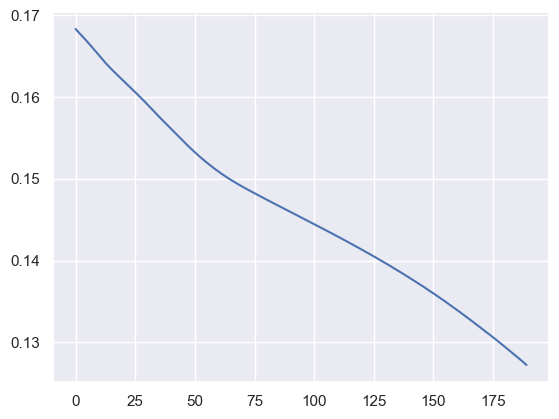

In [86]:
# plota as loss para ver se está treinando
plt.plot(historylogg.history['loss'][10:])

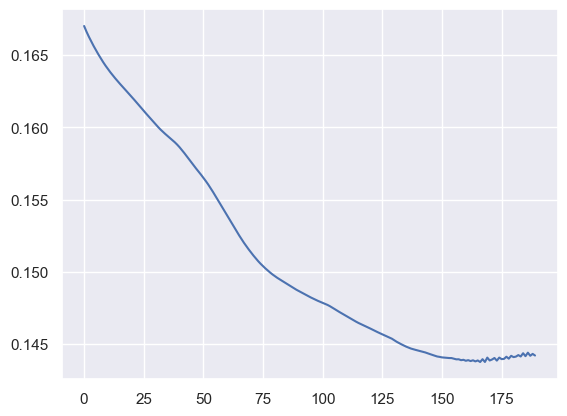

In [87]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historylogg.history['val_loss'][10:]) #dar smoothie nas curvas kkkkkk para colocar no paper

## Treinando Testes

In [23]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(36,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded3)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [24]:
Anasteste = Anas[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in Anasteste:
    Anasteste = cap_outliers(Anasteste, column)

In [26]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861', ]
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = Anasteste[colunas[i]].astype(float) - Anasteste[colunas[j]].astype(float)

In [27]:
AnasCores

,mag_psf_u-mag_psf_J0378,mag_psf_u-mag_psf_J0395,mag_psf_u-mag_psf_J0410,mag_psf_u-mag_psf_J0430,mag_psf_u-mag_psf_g,mag_psf_u-mag_psf_J0515,mag_psf_u-mag_psf_J0660,mag_psf_u-mag_psf_J0861,mag_psf_J0378-mag_psf_J0395,mag_psf_J0378-mag_psf_J0410,...,mag_psf_J0430-mag_psf_g,mag_psf_J0430-mag_psf_J0515,mag_psf_J0430-mag_psf_J0660,mag_psf_J0430-mag_psf_J0861,mag_psf_g-mag_psf_J0515,mag_psf_g-mag_psf_J0660,mag_psf_g-mag_psf_J0861,mag_psf_J0515-mag_psf_J0660,mag_psf_J0515-mag_psf_J0861,mag_psf_J0660-mag_psf_J0861
ObsID,,,,,,,,,,,,,,,,,,,,,
589602184,0.368000,0.426010,0.896000,0.967000,1.247000,1.419000,1.738130,1.874590,0.05801,0.52800,...,0.2800,0.45200,0.77113,0.907590,0.17200,0.49113,0.627590,0.31913,0.455590,0.136460
589602185,0.351000,0.455000,1.002270,1.071270,1.380270,1.569270,1.862800,1.986690,0.10400,0.65127,...,0.3090,0.49800,0.79153,0.915420,0.18900,0.48253,0.606420,0.29353,0.417420,0.123890
589602186,0.385000,0.460000,0.980680,1.039680,1.329680,1.508680,1.784000,1.915950,0.07500,0.59568,...,0.2900,0.46900,0.74432,0.876270,0.17900,0.45432,0.586270,0.27532,0.407270,0.131950
589603006,-1.604381,-1.417381,-0.717481,-0.590471,-0.048071,0.172519,1.690819,0.894759,0.18700,0.88690,...,0.5424,0.76299,2.28129,1.485230,0.22059,1.73889,0.942830,1.51830,0.722240,-0.796060
589603013,0.393740,0.498000,1.055630,1.143320,1.487620,1.685320,3.392860,2.103720,0.10426,0.66189,...,0.3443,0.54200,2.24954,0.960400,0.19770,1.90524,0.616100,1.70754,0.418400,-1.289140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695914244,0.362000,0.443790,0.899680,0.965680,1.267680,1.439680,2.118400,2.275421,0.08179,0.53768,...,0.3020,0.47400,1.15272,1.309741,0.17200,0.85072,1.007741,0.67872,0.835741,0.157021
695914245,0.413090,0.446060,0.889990,0.951260,1.226260,1.408260,1.690810,1.814860,0.03297,0.47690,...,0.2750,0.45700,0.73955,0.863600,0.18200,0.46455,0.588600,0.28255,0.406600,0.124050
695914246,0.402000,0.436700,0.939360,0.989360,1.305360,1.481360,1.777630,1.897650,0.03470,0.53736,...,0.3160,0.49200,0.78827,0.908290,0.17600,0.47227,0.592290,0.29627,0.416290,0.120020


In [93]:
xtrain = AnasCores

In [94]:
columnYtrain = 'Teffcnn'

In [95]:
ytrain = Anas[[columnYtrain]]

In [96]:
for column in Anas:
    print(column)

mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_J0660
mag_psf_J0861
alphacnn
Teffcnn
loggcnn
[Fe/H]cnn
[C/Fe]
[N/Fe]
[O/Fe]
[Mg/Fe]
[Al/Fe]
[Si/Fe]
[S/Fe]
[Ca/Fe]
[Ti/Fe]
[Cr/Fe]
[Ni/Fe]
[Cu/Fe]


In [97]:
ytrain

,Teffcnn
ObsID,
589602184,5778.14
589602185,5805.47
589602186,5832.24
589603006,5197.15
589603013,5764.16
...,...
695914244,5767.01
695914245,5726.83
695914246,5564.56


In [98]:
ytrain.max()

Teffcnn    6981.75
dtype: float64

In [99]:
ytrain.min()

Teffcnn    4456.16
dtype: float64

In [100]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

strencoder = "testeLOGG"
#""" comment this line to change if you want to encode the training Y
train_y= encoder.encode_DataFrame(ytrain, strencoder)
ytrain['train'] = train_y
del ytrain[columnYtrain]
#"""
train_y = ytrain

In [101]:
train_y

,train
ObsID,
589602184,0.046868
589602185,0.068511
589602186,0.089710
589603006,-0.413214
589603013,0.035798
...,...
695914244,0.038054
695914245,0.006236
695914246,-0.122265


In [37]:
#encoder.save_encoders()

In [102]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085, )

In [103]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [104]:
bs = 3000

In [110]:
modeltest = baseline_model_teste()

In [111]:
# Rodar os primeiros testes para ignorar os maiores loss                                              (sample_weight=sample_weights, )
modeltest.fit(X_train, Y_train, epochs = 200, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/200
1/1 - 0s - loss: 0.1487 - val_loss: 0.1468 - 475ms/epoch - 475ms/step
Epoch 2/200
1/1 - 0s - loss: 0.1475 - val_loss: 0.1457 - 45ms/epoch - 45ms/step
Epoch 3/200
1/1 - 0s - loss: 0.1463 - val_loss: 0.1447 - 40ms/epoch - 40ms/step
Epoch 4/200
1/1 - 0s - loss: 0.1452 - val_loss: 0.1436 - 40ms/epoch - 40ms/step
Epoch 5/200
1/1 - 0s - loss: 0.1440 - val_loss: 0.1425 - 38ms/epoch - 38ms/step
Epoch 6/200
1/1 - 0s - loss: 0.1428 - val_loss: 0.1415 - 41ms/epoch - 41ms/step
Epoch 7/200
1/1 - 0s - loss: 0.1417 - val_loss: 0.1404 - 37ms/epoch - 37ms/step
Epoch 8/200
1/1 - 0s - loss: 0.1406 - val_loss: 0.1394 - 40ms/epoch - 40ms/step
Epoch 9/200
1/1 - 0s - loss: 0.1395 - val_loss: 0.1383 - 38ms/epoch - 38ms/step
Epoch 10/200
1/1 - 0s - loss: 0.1383 - val_loss: 0.1372 - 39ms/epoch - 39ms/step
Epoch 11/200
1/1 - 0s - loss: 0.1372 - val_loss: 0.1362 - 39ms/epoch - 39ms/step
Epoch 12/200
1/1 - 0s - loss: 0.1361 - val_loss: 0.1351 - 37ms/epoch - 37ms/step
Epoch 13/200
1/1 - 0s - loss: 0.135

Epoch 103/200
1/1 - 0s - loss: 0.0720 - val_loss: 0.0700 - 41ms/epoch - 41ms/step
Epoch 104/200
1/1 - 0s - loss: 0.0718 - val_loss: 0.0699 - 40ms/epoch - 40ms/step
Epoch 105/200
1/1 - 0s - loss: 0.0716 - val_loss: 0.0699 - 39ms/epoch - 39ms/step
Epoch 106/200
1/1 - 0s - loss: 0.0714 - val_loss: 0.0698 - 37ms/epoch - 37ms/step
Epoch 107/200
1/1 - 0s - loss: 0.0712 - val_loss: 0.0697 - 39ms/epoch - 39ms/step
Epoch 108/200
1/1 - 0s - loss: 0.0711 - val_loss: 0.0696 - 39ms/epoch - 39ms/step
Epoch 109/200
1/1 - 0s - loss: 0.0709 - val_loss: 0.0695 - 42ms/epoch - 42ms/step
Epoch 110/200
1/1 - 0s - loss: 0.0707 - val_loss: 0.0694 - 38ms/epoch - 38ms/step
Epoch 111/200
1/1 - 0s - loss: 0.0705 - val_loss: 0.0693 - 39ms/epoch - 39ms/step
Epoch 112/200
1/1 - 0s - loss: 0.0703 - val_loss: 0.0692 - 40ms/epoch - 40ms/step
Epoch 113/200
1/1 - 0s - loss: 0.0701 - val_loss: 0.0691 - 38ms/epoch - 38ms/step
Epoch 114/200
1/1 - 0s - loss: 0.0700 - val_loss: 0.0690 - 36ms/epoch - 36ms/step
Epoch 115/200
1/

In [112]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historytest = modeltest.fit(X_train, Y_train, epochs = 2000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#modeltest.save('model/model_lamost_feh_V.h5')

Epoch 1/2000
1/1 - 0s - loss: 0.0593 - val_loss: 0.0627 - 67ms/epoch - 67ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0592 - val_loss: 0.0626 - 39ms/epoch - 39ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0591 - val_loss: 0.0626 - 36ms/epoch - 36ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0590 - val_loss: 0.0625 - 37ms/epoch - 37ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0589 - val_loss: 0.0624 - 38ms/epoch - 38ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0588 - val_loss: 0.0624 - 37ms/epoch - 37ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0587 - val_loss: 0.0623 - 38ms/epoch - 38ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0586 - val_loss: 0.0623 - 39ms/epoch - 39ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0585 - val_loss: 0.0622 - 37ms/epoch - 37ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0584 - val_loss: 0.0621 - 37ms/epoch - 37ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0583 - val_loss: 0.0621 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0582 - val_loss: 0.0620 - 37ms/epoch - 37ms/step
Epoch 13/2000
1/1 - 0s - 

1/1 - 0s - loss: 0.0508 - val_loss: 0.0571 - 44ms/epoch - 44ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0507 - val_loss: 0.0571 - 93ms/epoch - 93ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0506 - val_loss: 0.0570 - 128ms/epoch - 128ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0570 - 105ms/epoch - 105ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0505 - val_loss: 0.0569 - 62ms/epoch - 62ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0504 - val_loss: 0.0569 - 40ms/epoch - 40ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0503 - val_loss: 0.0568 - 79ms/epoch - 79ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0502 - val_loss: 0.0568 - 53ms/epoch - 53ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0502 - val_loss: 0.0568 - 72ms/epoch - 72ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0501 - val_loss: 0.0567 - 53ms/epoch - 53ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0500 - val_loss: 0.0567 - 38ms/epoch - 38ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0499 - val_loss: 0.0566 - 53ms/epoch - 53ms/step
Epoch 113/2000


Epoch 200/2000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0530 - 37ms/epoch - 37ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0531 - 36ms/epoch - 36ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0445 - val_loss: 0.0530 - 35ms/epoch - 35ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0530 - 37ms/epoch - 37ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0444 - val_loss: 0.0529 - 38ms/epoch - 38ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0443 - val_loss: 0.0529 - 37ms/epoch - 37ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0443 - val_loss: 0.0529 - 36ms/epoch - 36ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0442 - val_loss: 0.0528 - 38ms/epoch - 38ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0442 - val_loss: 0.0529 - 36ms/epoch - 36ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0441 - val_loss: 0.0527 - 38ms/epoch - 38ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0441 - val_loss: 0.0529 - 37ms/epoch - 37ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0441 - val_loss: 0.0527 - 37ms/epoch - 37ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0404 - val_loss: 0.0506 - 39ms/epoch - 39ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0404 - val_loss: 0.0505 - 39ms/epoch - 39ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0403 - val_loss: 0.0506 - 36ms/epoch - 36ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0403 - val_loss: 0.0504 - 37ms/epoch - 37ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0403 - val_loss: 0.0507 - 39ms/epoch - 39ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0403 - val_loss: 0.0504 - 36ms/epoch - 36ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0402 - val_loss: 0.0506 - 39ms/epoch - 39ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0402 - val_loss: 0.0504 - 36ms/epoch - 36ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0504 - 39ms/epoch - 39ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0504 - 35ms/epoch - 35ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0400 - val_loss: 0.0503 - 36ms/epoch - 36ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0400 - val_loss: 0.0504 - 35ms/epoch - 35ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0485 - 36ms/epoch - 36ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0483 - 40ms/epoch - 40ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0373 - val_loss: 0.0485 - 37ms/epoch - 37ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0372 - val_loss: 0.0483 - 37ms/epoch - 37ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0372 - val_loss: 0.0484 - 38ms/epoch - 38ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0483 - 39ms/epoch - 39ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0483 - 38ms/epoch - 38ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0483 - 40ms/epoch - 40ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0371 - val_loss: 0.0482 - 39ms/epoch - 39ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0483 - 40ms/epoch - 40ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0482 - 36ms/epoch - 36ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0370 - val_loss: 0.0484 - 38ms/epoch - 38ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0466 - 40ms/epoch - 40ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0466 - 36ms/epoch - 36ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0466 - 37ms/epoch - 37ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0465 - 37ms/epoch - 37ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0466 - 37ms/epoch - 37ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0465 - 40ms/epoch - 40ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0466 - 39ms/epoch - 39ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0464 - 40ms/epoch - 40ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0466 - 37ms/epoch - 37ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0464 - 38ms/epoch - 38ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0465 - 39ms/epoch - 39ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0464 - 36ms/epoch - 36ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0453 - 41ms/epoch - 41ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0454 - 41ms/epoch - 41ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0452 - 39ms/epoch - 39ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0454 - 37ms/epoch - 37ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0453 - 41ms/epoch - 41ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0454 - 42ms/epoch - 42ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0452 - 38ms/epoch - 38ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0453 - 40ms/epoch - 40ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0452 - 38ms/epoch - 38ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0452 - 38ms/epoch - 38ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0452 - 39ms/epoch - 39ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0452 - 36ms/epoch - 36ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0313 - val_loss: 0.0443 - 38ms/epoch - 38ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0313 - val_loss: 0.0443 - 40ms/epoch - 40ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0444 - 43ms/epoch - 43ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0442 - 40ms/epoch - 40ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0444 - 41ms/epoch - 41ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0442 - 43ms/epoch - 43ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0443 - 45ms/epoch - 45ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0442 - 42ms/epoch - 42ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0443 - 39ms/epoch - 39ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0312 - val_loss: 0.0442 - 43ms/epoch - 43ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0311 - val_loss: 0.0443 - 45ms/epoch - 45ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0311 - val_loss: 0.0442 - 44ms/epoch - 44ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0434 - 45ms/epoch - 45ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0435 - 238ms/epoch - 238ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0434 - 38ms/epoch - 38ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0436 - 50ms/epoch - 50ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0434 - 51ms/epoch - 51ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0436 - 45ms/epoch - 45ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0434 - 39ms/epoch - 39ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0435 - 38ms/epoch - 38ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0433 - 36ms/epoch - 36ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0434 - 37ms/epoch - 37ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0434 - 37ms/epoch - 37ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0433 - 40ms/epoch - 40ms/step
Ep

Epoch 893/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0427 - 44ms/epoch - 44ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0427 - 45ms/epoch - 45ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0427 - 46ms/epoch - 46ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0426 - 44ms/epoch - 44ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0427 - 42ms/epoch - 42ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0426 - 45ms/epoch - 45ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0427 - 47ms/epoch - 47ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0426 - 44ms/epoch - 44ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0428 - 47ms/epoch - 47ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0426 - 110ms/epoch - 110ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0428 - 141ms/epoch - 141ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0288 - val_loss: 0.0426 - 39ms/epoch - 39ms/step


Epoch 992/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0420 - 39ms/epoch - 39ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0420 - 48ms/epoch - 48ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0421 - 48ms/epoch - 48ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0420 - 46ms/epoch - 46ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0421 - 45ms/epoch - 45ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0419 - 42ms/epoch - 42ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0421 - 45ms/epoch - 45ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0419 - 48ms/epoch - 48ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0421 - 49ms/epoch - 49ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0419 - 46ms/epoch - 46ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0420 - 47ms/epoch - 47ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0419 - 45ms/epoch - 45ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0413 - 38ms/epoch - 38ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0415 - 37ms/epoch - 37ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0414 - 38ms/epoch - 38ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0416 - 35ms/epoch - 35ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0414 - 37ms/epoch - 37ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0416 - 38ms/epoch - 38ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0413 - 38ms/epoch - 38ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0415 - 37ms/epoch - 37ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0271 - val_loss: 0.0413 - 40ms/epoch - 40ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0414 - 37ms/epoch - 37ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0413 - 38ms/epoch - 38ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0270 - val_loss: 0.0413 - 37ms/epoch - 37

Epoch 1188/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0410 - 35ms/epoch - 35ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0409 - 34ms/epoch - 34ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0411 - 92ms/epoch - 92ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0409 - 37ms/epoch - 37ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0411 - 75ms/epoch - 75ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0409 - 39ms/epoch - 39ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0411 - 70ms/epoch - 70ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0409 - 37ms/epoch - 37ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0264 - val_loss: 0.0410 - 69ms/epoch - 69ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0409 - 35ms/epoch - 35ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0409 - 71ms/epoch - 71ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0409 - 36ms/epoch - 36

Epoch 1286/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0405 - 38ms/epoch - 38ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0406 - 37ms/epoch - 37ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0405 - 35ms/epoch - 35ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0406 - 37ms/epoch - 37ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0406 - 35ms/epoch - 35ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0407 - 40ms/epoch - 40ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0406 - 37ms/epoch - 37ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0408 - 37ms/epoch - 37ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0405 - 37ms/epoch - 37ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0408 - 39ms/epoch - 39ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0406 - 36ms/epoch - 36ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0408 - 36ms/epoch - 36

Epoch 1384/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0403 - 39ms/epoch - 39ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0403 - 35ms/epoch - 35ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0404 - 37ms/epoch - 37ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0403 - 35ms/epoch - 35ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0404 - 36ms/epoch - 36ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0403 - 37ms/epoch - 37ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0405 - 35ms/epoch - 35ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0403 - 38ms/epoch - 38ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0405 - 37ms/epoch - 37ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0403 - 37ms/epoch - 37ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0253 - val_loss: 0.0405 - 41ms/epoch - 41ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0252 - val_loss: 0.0403 - 37ms/epoch - 37

Epoch 1482/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0402 - 33ms/epoch - 33ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0401 - 38ms/epoch - 38ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0401 - 38ms/epoch - 38ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0401 - 36ms/epoch - 36ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0401 - 37ms/epoch - 37ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0402 - 36ms/epoch - 36ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0401 - 36ms/epoch - 36ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0402 - 35ms/epoch - 35ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0401 - 35ms/epoch - 35ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0402 - 35ms/epoch - 35ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0400 - 36ms/epoch - 36ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0402 - 38ms/epoch - 38

Epoch 1580/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0398 - 36ms/epoch - 36ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0400 - 37ms/epoch - 37ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0398 - 39ms/epoch - 39ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0400 - 42ms/epoch - 42ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0398 - 40ms/epoch - 40ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0399 - 38ms/epoch - 38ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0398 - 37ms/epoch - 37ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0398 - 40ms/epoch - 40ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0399 - 40ms/epoch - 40ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0398 - 36ms/epoch - 36ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0399 - 37ms/epoch - 37ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0398 - 36ms/epoch - 36

Epoch 1678/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0397 - 36ms/epoch - 36ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0397 - 37ms/epoch - 37ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0398 - 37ms/epoch - 37ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0396 - 37ms/epoch - 37ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0398 - 39ms/epoch - 39ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0396 - 37ms/epoch - 37ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0398 - 36ms/epoch - 36ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0396 - 40ms/epoch - 40ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0397 - 38ms/epoch - 38ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0396 - 34ms/epoch - 34ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0239 - val_loss: 0.0397 - 36ms/epoch - 36ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0239 - val_loss: 0.0396 - 36ms/epoch - 36

Epoch 1776/2000
1/1 - 0s - loss: 0.0237 - val_loss: 0.0397 - 35ms/epoch - 35ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0237 - val_loss: 0.0395 - 36ms/epoch - 36ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0237 - val_loss: 0.0396 - 36ms/epoch - 36ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0237 - val_loss: 0.0395 - 37ms/epoch - 37ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0396 - 36ms/epoch - 36ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0396 - 37ms/epoch - 37ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0395 - 38ms/epoch - 38ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0396 - 36ms/epoch - 36ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0395 - 35ms/epoch - 35ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0396 - 38ms/epoch - 38ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0395 - 35ms/epoch - 35ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0236 - val_loss: 0.0397 - 39ms/epoch - 39

Epoch 1874/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0394 - 36ms/epoch - 36ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0395 - 39ms/epoch - 39ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0394 - 35ms/epoch - 35ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0396 - 36ms/epoch - 36ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0394 - 37ms/epoch - 37ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0396 - 36ms/epoch - 36ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0394 - 37ms/epoch - 37ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0396 - 42ms/epoch - 42ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0234 - val_loss: 0.0394 - 36ms/epoch - 36ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0395 - 37ms/epoch - 37ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0394 - 37ms/epoch - 37ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0394 - 37ms/epoch - 37

Epoch 1972/2000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0393 - 57ms/epoch - 57ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0394 - 53ms/epoch - 53ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 46ms/epoch - 46ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0394 - 42ms/epoch - 42ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 42ms/epoch - 42ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 41ms/epoch - 41ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 37ms/epoch - 37ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 37ms/epoch - 37ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0394 - 39ms/epoch - 39ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 38ms/epoch - 38ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0394 - 37ms/epoch - 37ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0393 - 40ms/epoch - 40

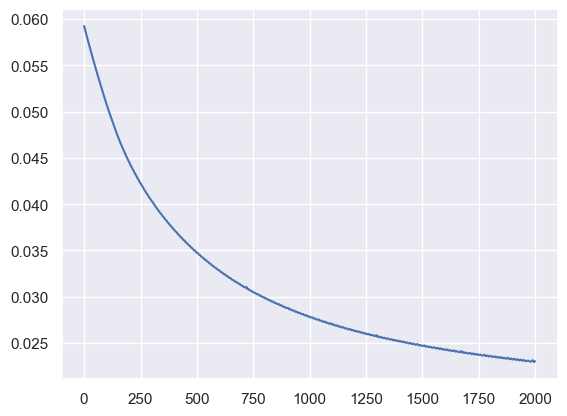

In [115]:
# plota as loss para ver se está treinando
plt.plot(historytest.history['loss'][:])

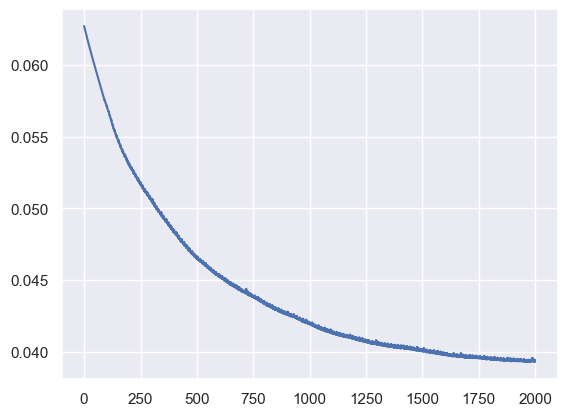

In [116]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historytest.history['val_loss'][:]) #dar smoothie nas curvas kkkkkk para colocar no paper

In [117]:
predtest = modeltest.predict(X_test)

15/15 [==============================] - 0s 8ms/step


In [118]:
# Rodar apenas se precisar dar decode
predaux = encoder.decode_DataFrame(predtest, strencoder)
ytestaux = encoder.decode_DataFrame(Y_test, strencoder)
Y_test['testDecoded'] = ytestaux
Y_test['predDecoded'] = predaux
del Y_test['train']

Text(0, 0.5, 'Y_test')

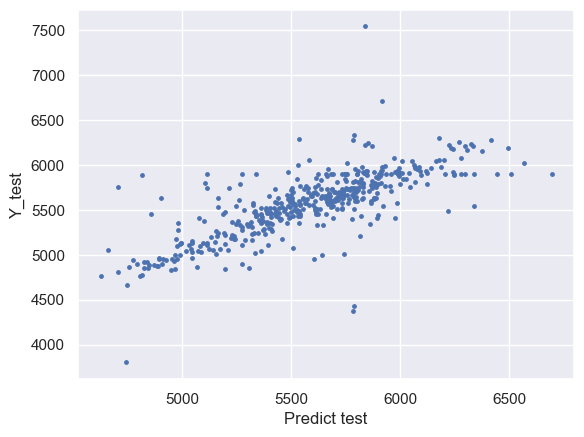

In [119]:
# APENAS se precisou dar decoded
# plota o pred de acordo com o Y_test (feh) 
plt.scatter(Y_test['testDecoded'], Y_test['predDecoded'], s=6)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [121]:
Y_test

,testDecoded,predDecoded
ObsID,,
589603057,5621.59,5456.579102
635010231,5991.07,5904.616211
626207156,5155.38,5012.170898
635004114,4838.32,4913.737305
654511138,5425.65,5463.726562
...,...,...
626202249,5249.54,5542.124023
623707035,5322.41,5312.389160
654505007,5396.02,5461.750000


Text(0, 0.5, 'Y_test')

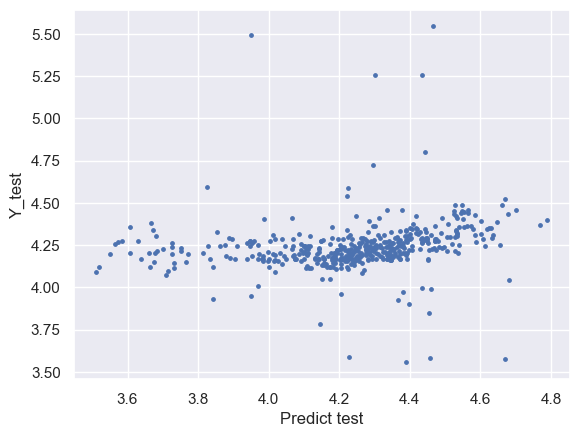

In [85]:
# SE NÃO FOR DECODED
# plota o pred de acordo com o Y_test (feh)
plt.scatter(Y_test, predtest, s=6)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [87]:
# se n precisar dar decode é só rodar essa
Y_test['Predict'] = predtest

In [120]:
Y_test

,testDecoded,predDecoded
ObsID,,
589603057,5621.59,5456.579102
635010231,5991.07,5904.616211
626207156,5155.38,5012.170898
635004114,4838.32,4913.737305
654511138,5425.65,5463.726562
...,...,...
626202249,5249.54,5542.124023
623707035,5322.41,5312.389160
654505007,5396.02,5461.750000


In [122]:
Y_test.to_csv("E:\IC\Predicts\\asd.csv")

# Testando modelos treinados

##### teff

In [65]:
predteff = modelteff.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [79]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(predteff, Y_test, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

NameError: name 'predteff' is not defined

In [67]:
score = r2_score(Y_test, predteff)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 65.0%


In [68]:
score = mean_absolute_error(Y_test, predteff)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.12


In [69]:
score = np.sqrt(mean_absolute_error(Y_test, predteff))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.35


(462, 1)

In [78]:
predteff

NameError: name 'predteff' is not defined

##### logg

In [88]:
predlogg = modellogg.predict(X_test)

15/15 [==============================] - 0s 1ms/step


In [89]:
#encoder.decode_DataFrame(predologg, "logg_training")

Text(0, 0.5, 'Y_test')

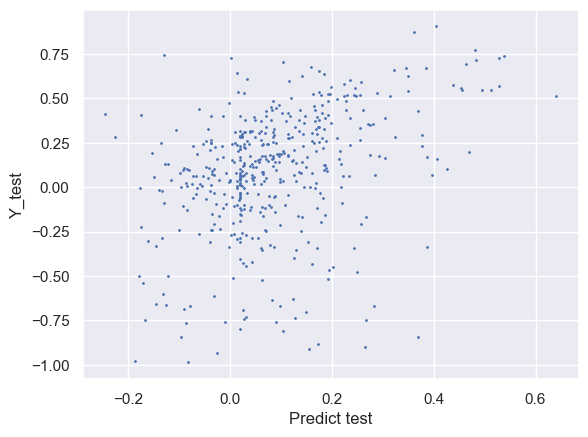

In [90]:
# plota o pred de acordo com o Y_test (logg)
plt.scatter(predlogg, Y_test, s=1)
#plt.xlim(3, 5)
#plt.ylim(3, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [162]:
score = r2_score(Y_test, predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 66.0%


In [163]:
score = mean_absolute_error(Y_test, predlogg)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.16


In [164]:
score = np.sqrt(mean_absolute_error(Y_test, predlogg))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.4


##### feh

In [41]:
predfeh = modelfeh.predict(X_test)

15/15 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Y_test')

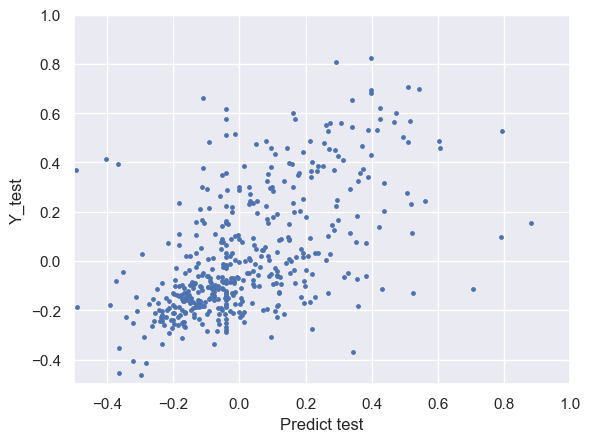

In [42]:
# plota o pred de acordo com o Y_test (feh)
plt.scatter(predfeh, Y_test, s=6)
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [43]:
score = r2_score(Y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 14.000000000000002%


In [44]:
score = mean_absolute_error(Y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.17


In [45]:
score = np.sqrt(mean_absolute_error(Y_test, predfeh))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.41


In [47]:
Y_test.shape

(462, 1)

In [48]:
predfeh.shape

(462, 1)

In [39]:
for i in range(len(pred)):
    print(f'{pred[i]} - {np.array(Y_test)[i]}')

[-0.01653169] - [0.10436812]
[-0.0164127] - [0.12504168]
[-0.01655977] - [0.16505502]
[-0.01605693] - [-0.26775592]
[-0.01719073] - [-0.31977326]
[-0.01660319] - [-0.79393131]
[-0.01743995] - [-0.20306769]
[-0.01610001] - [-0.30576859]
[-0.01593579] - [-0.3957986]
[-0.01600106] - [-0.53117706]
[-0.01713799] - [0.31177059]
[-0.01663167] - [0.46115372]
[-0.01659522] - [-0.11103701]
[-0.0163922] - [0.10370123]
[-0.0168667] - [-0.48849617]
[-0.01728272] - [-0.07835945]
[-0.01648687] - [0.23107703]
[-0.01596602] - [-0.75125042]
[-0.01706299] - [0.20906969]
[-0.01727004] - [-0.01767256]
[-0.01663666] - [0.31843948]
[-0.01672502] - [0.28309436]
[-0.0164045] - [-0.17039013]
[-0.01630088] - [0.00033344]
[-0.0166153] - [0.56585529]
[-0.01672463] - [0.1357119]
[-0.01670246] - [-0.78459486]
[-0.01689277] - [0.02167389]
[-0.0165698] - [0.28442814]
[-0.01643093] - [-0.20306769]
[-0.01682014] - [-0.8246082]
[-0.01709703] - [0.04234745]
[-0.0168339] - [0.32710904]
[-0.01652981] - [-0.7705902]
[-0.0164

[-0.01645855] - [0.03567856]
[-0.01649794] - [0.18972991]
[-0.01685493] - [0.12304101]
[-0.01700574] - [0.24708236]
[-0.01723836] - [-0.31243748]
[-0.01828946] - [0.53251084]
[-0.01629045] - [-0.39846616]
[-0.01658951] - [0.21707236]
[-0.01602059] - [-0.4624875]
[-0.01655132] - [0.25775258]
[-0.01618243] - [-0.15771924]
[-0.01646179] - [0.08636212]
[-0.01750152] - [-0.08969657]
[-0.01642973] - [-0.01833945]
[-0.01669034] - [0.18772924]
[-0.01789594] - [-0.26375458]
[-0.01674598] - [0.06102034]
[-0.01679963] - [-0.51583861]
[-0.01728839] - [0.41513838]
[-0.01662131] - [0.20973658]
[-0.01640589] - [-0.00566856]
[-0.01756053] - [0.05968656]
[-0.01771483] - [0.34844948]
[-0.01611613] - [-0.22507503]
[-0.01791413] - [0.66255418]
[-0.01892938] - [0.42980994]
[-0.01657025] - [0.02634211]
[-0.01639197] - [-0.13104368]
[-0.01689706] - [-0.43381127]
[-0.01724554] - [0.18506169]
[-0.01667199] - [0.4924975]
[-0.01639934] - [0.12904301]
[-0.01781918] - [0.31843948]
[-0.01787825] - [-0.03834612]
[-0

[-0.01660512] - [-0.25241747]
[-0.01780531] - [-0.35578526]
[-0.01755435] - [0.4804935]
[-0.01630076] - [-0.11970657]
[-0.01791588] - [0.03701234]
[-0.01654501] - [0.35378459]
[-0.01627827] - [-0.33844615]
[-0.01582661] - [-0.4198066]
[-0.01558513] - [-0.64788263]
[-0.01683811] - [0.0816939]
[-0.0160722] - [-0.34178059]
[-0.01789093] - [0.10770257]
[-0.01637072] - [0.11103701]
[-0.01641654] - [0.08236079]
[-0.01700184] - [0.38179393]
[-0.01746067] - [0.41513838]
[-0.01672799] - [-0.6132044]
[-0.01668143] - [0.24708236]
[-0.01728919] - [-0.66988996]
[-0.01694541] - [-0.42714238]
[-0.01651344] - [0.06768923]
[-0.01635009] - [0.03367789]
[-0.01700936] - [0.15505168]
[-0.01690149] - [-0.06502167]
[-0.01764742] - [0.9153051]
[-0.01638438] - [0.15305102]
[-0.01612722] - [-0.25908636]
[-0.01629251] - [-0.06835612]
[-0.01763986] - [0.23974658]
[-0.01795583] - [0.23441147]
[-0.01658437] - [0.32444148]
[-0.01662675] - [0.3717906]
[-0.01724274] - [0.31377126]
[-0.01634398] - [0.03101034]
[-0.0154

[-0.0165527] - [0.25508503]
[-0.01696367] - [0.04234745]
[-0.01831838] - [-0.25241747]
[-0.0164253] - [0.13304435]
[-0.0164202] - [-0.01167056]
[-0.01663055] - [0.1723908]
[-0.01652448] - [0.07502501]
[-0.01660411] - [0.30376792]
[-0.01754193] - [0.45848616]
[-0.01693603] - [-0.4804935]
[-0.01601666] - [-0.32510837]
[-0.01775426] - [0.15038346]
[-0.01649719] - [0.24108036]
[-0.01745045] - [0.18106035]
[-0.01644963] - [0.18172724]
[-0.01605029] - [-0.22840947]
[-0.01649569] - [0.03701234]
[-0.01613047] - [-0.39646549]
[-0.01628291] - [-0.05035012]
[-0.01778159] - [0.29509837]
[-0.01752906] - [-0.06235412]
[-0.01643795] - [0.01633878]
[-0.01665209] - [0.0936979]
[-0.0163798] - [-0.61787262]
[-0.0168028] - [0.34044682]
[-0.01718529] - [-0.21507169]
[-0.01632306] - [0.01233745]
[-0.01714397] - [0.35711904]
[-0.01779806] - [-0.39046349]
[-0.01644585] - [0.0576859]
[-0.01587528] - [-0.67522508]
[-0.01641118] - [0.07835945]
[-0.01774746] - [0.10370123]
[-0.01639793] - [-0.09436479]
[-0.016382

[-0.01653562] - [0.16105368]
[-0.01684469] - [0.02834278]
[-0.01609569] - [-0.31043681]
[-0.01656495] - [0.20373458]
[-0.01605884] - [-0.36445482]
[-0.01709988] - [0.19773258]
[-0.01666368] - [0.27042347]
[-0.01775464] - [0.51583861]
[-0.01719751] - [-0.62454151]
[-0.01651961] - [0.35378459]
[-0.01633592] - [-0.11437146]
[-0.01633728] - [-0.12770924]
[-0.01643472] - [0.17572524]
[-0.01731284] - [-0.36112037]
[-0.01734452] - [0.03101034]
[-0.01789354] - [-0.69523174]
[-0.01728237] - [0.76525509]
[-0.01631436] - [-0.75591864]
[-0.01643317] - [-0.2384128]
[-0.01754528] - [0.17172391]
[-0.01655378] - [0.16905635]
[-0.01830481] - [0.51317106]
[-0.01637268] - [-0.04301434]
[-0.01775841] - [0.39513171]
[-0.01768951] - [0.12637546]
[-0.01673838] - [0.14904968]
[-0.01682598] - [-0.16972324]
[-0.0175162] - [0.10103368]
[-0.01679049] - [-0.34844948]
[-0.0174406] - [0.15171724]
[-0.01636565] - [-0.10236746]
[-0.0168672] - [0.47315772]
[-0.01625465] - [-0.12170724]
[-0.01651735] - [0.08969657]
[-0.

[-0.01770855] - [-0.45115038]
[-0.01603478] - [-0.48849617]
[-0.01711386] - [0.28242748]
[-0.01711472] - [0.06835612]
[-0.01720216] - [-0.19906636]
[-0.01695013] - [0.03234411]
[-0.01697752] - [0.01033678]
[-0.01614857] - [-0.23774592]
[-0.01694431] - [-0.14104702]
[-0.01623188] - [-0.1963988]
[-0.01670451] - [0.36245415]
[-0.01642333] - [0.08569523]
[-0.01712086] - [-0.77192397]
[-0.01656627] - [0.10770257]
[-0.01789467] - [-0.37045682]
[-0.01705125] - [0.37845949]
[-0.01760638] - [-0.49716572]
[-0.01720372] - [0.37912638]
[-0.01639787] - [-0.32977659]
[-0.01677344] - [-0.65855285]
[-0.01542979] - [-0.83327776]
[-0.01647913] - [0.06635545]
[-0.01687739] - [0.45515172]
[-0.01683156] - [-0.32510837]
[-0.0180788] - [-0.02834278]
[-0.01771458] - [0.16105368]
[-0.01602149] - [-0.27575859]
[-0.01733322] - [0.36045348]
[-0.01677316] - [0.15305102]
[-0.01687529] - [-0.68856285]
[-0.01599811] - [-0.45515172]
[-0.01658414] - [0.03034345]
[-0.01603158] - [-0.01967322]
[-0.01650591] - [0.28176059

[-0.01755303] - [0.22840947]
[-0.01632137] - [-0.09636546]
[-0.01694937] - [0.25175058]
[-0.01795583] - [-0.11570524]
[-0.01640976] - [0.09836612]
[-0.01635421] - [0.05568523]
[-0.01701529] - [0.08836279]
[-0.01642936] - [-0.01167056]
[-0.01645054] - [0.05835278]
[-0.01765026] - [-0.46982327]
[-0.017203] - [0.52584195]
[-0.01667711] - [-0.33844615]
[-0.01634713] - [-0.03767923]
[-0.01629433] - [-0.8732911]
[-0.0165433] - [0.28976325]
[-0.01752366] - [0.24841614]
[-0.01682671] - [0.17772591]
[-0.01746516] - [0.35178393]
[-0.01528125] - [-0.88329443]
[-0.01641044] - [0.21240413]
[-0.01657732] - [-0.34178059]
[-0.01690208] - [0.00966989]
[-0.01662407] - [0.4198066]
[-0.01705695] - [-0.34978326]
[-0.01640954] - [-0.02767589]
[-0.01684946] - [0.53384461]
[-0.01636179] - [-0.04368123]
[-0.01718896] - [-0.14304768]
[-0.01706508] - [-0.3231077]
[-0.0166405] - [0.41313771]
[-0.01681572] - [0.22507503]
[-0.01756062] - [0.40513505]
[-0.01668863] - [0.58786262]
[-0.01726097] - [0.25575192]
[-0.017

In [174]:
a = []
f = 0
for i in range(len(pred)):
    a.append(pred[i] - np.array(Y_test)[i])
    f += int(pred[i] - np.array(Y_test)[i])

In [175]:
f/len(pred)

-0.0017262875227774049

In [176]:
a = np.array(a)

In [177]:
print(f'MAX: {a.max()}')
print(f'MIN: {a.min()}')
print(f'MEAN: {a.mean()}')

MAX: 1.6103280067443846
MIN: -17.713723373413085
MEAN: -0.020520809442062127


In [50]:
score = r2_score(Y_test, pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [52]:
score = mean_absolute_error(Y_test, pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.06


In [67]:
score = np.sqrt(mean_absolute_error(Y_test, pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))


The Mean Absolute Error of our Model is 0.24


In [64]:
x = scaler.inverse_transform(pred)

In [65]:
y = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'Y_test')

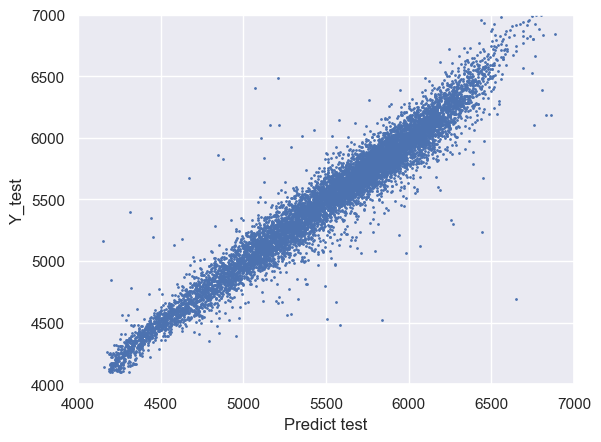

In [66]:
# plota o pred de acordo com o Y_test (teff) removendo a normalização
plt.scatter(x, y, s=1)
plt.xlim(4000, 7000)
plt.ylim(4000, 7000)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

# Aplicando rede treinada

In [185]:
csv2 = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])

In [186]:
csv2

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926


In [187]:
ndf = csv2[['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [188]:
ndf.shape

(2187, 12)

In [189]:
aply_x = ndf.to_numpy()

In [190]:
#scaler = MinMaxScaler(feature_range = (-1,1))

In [192]:
aply_n= scaler.fit_transform(aply_x)

In [229]:
#when applying the model to your data (eg., jplus dr1), please run the following code.
#model=load_model('model/model_lamost_teff_V2_Final.h5')
result=model.predict(aply_n)

69/69 [==============================] - 0s 2ms/step


In [230]:
result

array([[-0.32188916],
       [ 0.46823418],
       [ 0.52766514],
       ...,
       [-0.08489259],
       [-0.21540591],
       [ 0.16249362]], dtype=float32)

In [231]:
x = scaler.inverse_transform(result)

In [232]:
x

array([[5065.827 ],
       [6250.617 ],
       [6339.734 ],
       ...,
       [5421.2036],
       [5225.499 ],
       [5792.159 ]], dtype=float32)

In [197]:
#csv3 = csv2

In [235]:
csv3['teff_predict'] = x

In [236]:
csv3

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal,feh_predict,logg_predict,teff_predict
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615,-0.058913,3.635599,5065.827148
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160,-0.059050,3.595240,6250.617188
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880,-0.057255,3.681078,6339.733887
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966,0.207014,3.488342,5085.914062
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895,0.050466,3.624842,6131.705566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498,0.737091,3.661139,5282.076660
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769,0.745572,3.606813,5205.132812
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926,0.871691,3.857249,5421.203613


In [237]:
csv3.to_csv("Halpha_Final.csv")